In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling

#from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
stomp = DecisionTreeClassifier(max_depth=1)

In [5]:
ada_clf = AdaBoostClassifier(stomp)

In [6]:
ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.9210526315789473

In [8]:
ada_clf.feature_importances_

array([0.  , 0.  , 0.42, 0.58])

<h2><a href="https://www.kaggle.com/spscientist/students-performance-in-exams">Student Performance Dataset</a></h2>

In [9]:
data = pd.read_csv("datasets\StudentsPerformance.csv")

In [10]:
columns = data.columns

In [11]:
data.profile_report(progress_bar=False)

In [12]:
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
y = data["math score"]
X = data.drop(['math score', 'reading score','writing score'], axis=1)

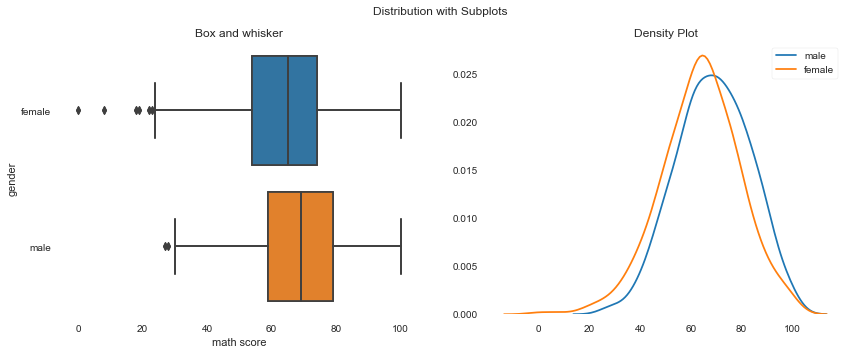

In [14]:
## fig, axs = plt.subplots(1,1,2)
plt.figure(figsize=(14, 5))
plt.suptitle("Distribution with Subplots")

plt.subplot(1,2,1)
plt.title("Box and whisker")
sns.boxplot(data["math score"], data["gender"])
sns.boxplot(data["math score"], data["gender"])

plt.subplot(1,2,2)
plt.title("Density Plot")
sns.kdeplot(data[data["gender"] == "male"]["math score"], label="male")
sns.kdeplot(data[data["gender"] == "female"]["math score"], label="female")
plt.show()

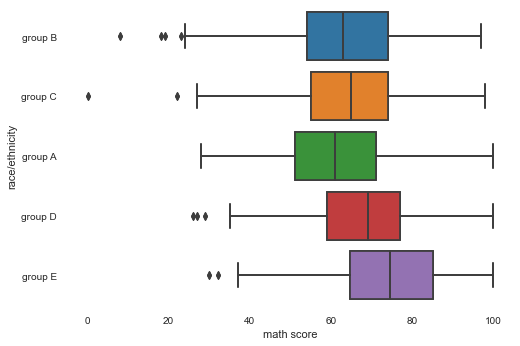

In [15]:
## fig, axs = plt.subplots(1,1,2)

sns.boxplot(data["math score"], data["race/ethnicity"])
sns.boxplot(data["math score"], data["race/ethnicity"])

plt.show()

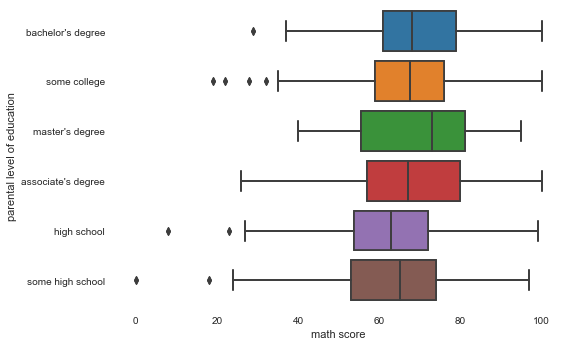

In [16]:
sns.boxplot(data["math score"], data["parental level of education"])
sns.boxplot(data["math score"], data["parental level of education"])

plt.show()

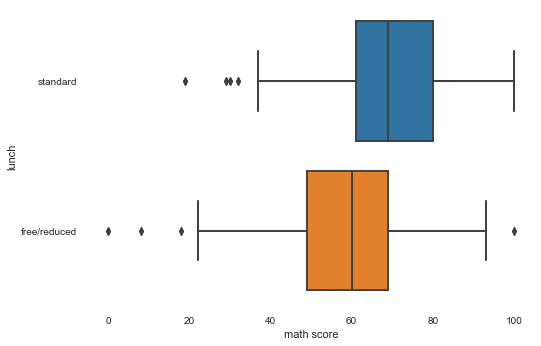

In [17]:
sns.boxplot(data["math score"], data["lunch"])
sns.boxplot(data["math score"], data["lunch"])

plt.show()

In [18]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

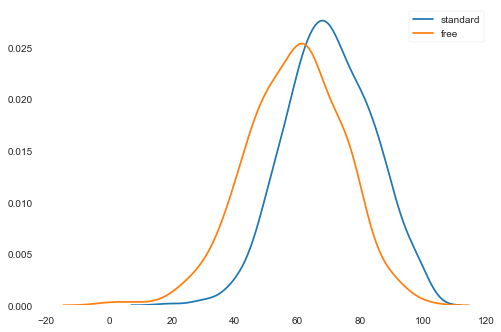

In [19]:
sns.kdeplot(data[data["lunch"] == "standard"]["math score"], label="standard")
sns.kdeplot(data[data["lunch"] == "free/reduced"]["math score"], label="free")
plt.show()

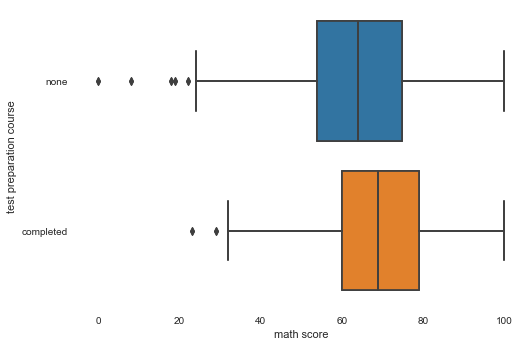

In [20]:
sns.boxplot(data["math score"], data["test preparation course"])
sns.boxplot(data["math score"], data["test preparation course"])

plt.show()

In [21]:
#data["score_new"] = pd.qcut(data["math score"], [0,40,50,60,70,80,90,100])

In [22]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [23]:
for col in X.columns:
    X[col] = enc.fit_transform(X[col])

In [24]:
stomp = DecisionTreeRegressor(max_depth=1)

In [25]:
ada_boost = AdaBoostRegressor(stomp)

In [26]:
ada_boost.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [27]:
ada_boost.feature_importances_

array([0.14507977, 0.10827709, 0.14525836, 0.49780128, 0.10358351])

In [28]:
X.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

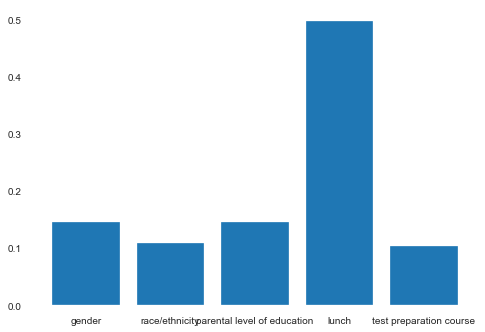

In [29]:
plt.bar(X.columns.values, ada_boost.feature_importances_)
plt.show()